### Import thư viện

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Đọc dữ liệu từ file csv

In [3]:
df = pd.read_csv("./SampleSuperstore.csv",encoding = "ISO-8859-1")

## Tiền xử lý

**In 5 dòng đầu tiên của dữ liệu**

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Thông tin số dòng và số cột**

In [5]:
df.shape

(9994, 21)

**Mô tả dữ liệu**

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**Thông tin cột**

In [7]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

**Kiểu dữ liệu của từng cột**

In [8]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

**Số giá trị null của từng cột**

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Ta thấy không có giá trị null trong dataframe

**Loại bỏ cột không cần thiết**

Các cột bị loại bỏ:
- Cột `Country` vì chỉ có một giá trị duy nhất là "United States"
- Cột `Order ID` không mang giá trị hữu ích trong trực quan hóa và mô hình hóa dữ liệu
- Cột `Postal Code` chỉ là id của `City` đã được thể hiện ở cột trước

In [10]:
df["Country"].unique()

array(['United States'], dtype=object)

In [11]:
unused_columns = [
    'Country', 
    'Order ID',
    'Postal Code']

df.drop(columns=unused_columns, inplace=True)
df.columns

Index(['Row ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

**Chuyển về kiểu dữ liệu datetime**

Áp dung cho 2 cột `Order Date` và `Ship Date`

In [12]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

Kiểu tra kiểu dữ liệu

In [13]:
df.dtypes

Row ID                    int64
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Cách trích xuất thông tin từ dữ liệu datetime

In [14]:
df['Order Date'].dt.day

0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: Order Date, Length: 9994, dtype: int64

## Hàm tiện ích ##

In [15]:
# Helper Function For Visualization
def Viz_Bar(df1 , cx , cy ,t='',rot="horizontal" , x=True ):
    if(x is False):
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(10)[cx], df1.head(10)[cy], align='center', color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        ax.set_yticks(df1.head(10)[cx], labels=df1.head(10)[cx])
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation = rot)
        plt.show()
    else :
        plt.bar(df1.head(10)[cx] ,df1.head(10)[cy] ,  color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] )
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation = rot)
        plt.show()
        

## Đưa ra câu hỏi và câu trả lời

**Câu 1:** Sự khác nhau về doanh số của các hạng mục giữa các vùng miền của nước Mỹ?

**Câu 2:** Số lượng lượt mua sắm ở mỗi bang khác nhau như thế nào?

**Câu 3:** Số lượng các sản phẩm bán ra của mỗi danh mục qua từng năm tăng giảm như thế nào?

**Câu 4:** Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

**Câu 5:** Hãy phân tích về các sự kiện discount của cửa hàng và mối liên hệ giữa Discount và các yếu tố khác.

**Câu 6:** Quan sát và đánh giá về khách hàng.

**Câu 7:** Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống.

## Câu hỏi 1:

**Nội dung câu hỏi:** Sự khác nhau về doanh số của các hạng mục giữa các vùng miền của nước Mỹ?


**Loại biểu đồ sử dụng:** Tree Map

**Tính phù hợp của biểu đồ với dữ liệu:** TreeMap là một loại biểu đồ thống kê hiển thị dữ liệu dưới dạng các hình chữ nhật có diện tích khác nhau, trong đó độ lớn của hình chữ nhật sẽ đại diện cho giá trị lượng của một biến. Ta sẽ biểu tổng doanh số ở mỗi hạng mục sản phẩm bằng diện tích các hình chữ nhật theo từng vùng miền (vùng trung tâm, miền đông, miền tây, miền nam). Bằng cách này ta có thể dễ dàng so sánh tỉ lệ doanh thu giữa các hạng mục sản phẩm và giữa các vùng miền với nhau.

**Trực quan hóa:**

In [16]:
plot_df=df.groupby(["Region","Category"])["Sales"].sum().reset_index()

In [17]:
fig = px.treemap(plot_df,
                 path = ['Region','Category','Sales'],
                 values = 'Sales')

fig.update_layout(title={'text': "Sales by categories in the US regions",'y':0.85,'x':0.5},
                  titlefont = dict(size = 25, family="Franklin Gothic"),
                  template='simple_white',
                  paper_bgcolor='#DDF7E6',
                  plot_bgcolor='#FFF1D7',
                  treemapcolorway = ["#C44B6E",'#5F8D37', "#F7AD45","#97D0D7"],
                  height = 600,
                  width = 1000,
                  margin=dict(t=130 ,))
fig.show()

Nhận xét:

Xếp hạng tổng doanh số các vùng miền như sau: West > East > Central > South.

Sản phẩm về công nghệ (Technology) có doanh số cao hơn các doanh mục sản phẩm khác tại miền Tây, miền Nam và vùng trung tâm.

## Câu hỏi 2:

**Nội dung câu hỏi:** Số lượng lượt mua sắm ở mỗi bang khác nhau như thế nào?

**Loại biểu đồ sử dụng:** Chorolepth map

**Tính phù hợp của biểu đồ với dữ liệu:** Dữ liệu để trả lời cho câu hỏi này gồm có 2 loại đó là: dạng số (tổng số lượng lượt mua sắm) và vị trí (các bang của nước Mỹ). Dùng biểu đồ Chorolepth giúp dễ dàng so sánh tổng số lượng lượt mua sắm giữa các khu vực. Biểu đồ choropleth thể hiện giá trị dữ liệu theo mức độ màu sắc. Điều này cho phép người sử dụng dễ dàng so sánh giá trị dữ liệu giữa các khu vực.

**Trực quan hóa:**

In [18]:
#Xử lý dữ liệu
State_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

plot_df=df.copy()
plot_df['State_code'] = plot_df['State'].replace(State_code)

In [19]:
# Plot
fig = go.Figure(data=go.Choropleth(
    locations= plot_df['State_code'].value_counts().index,
    z = plot_df['State_code'].value_counts(),
    locationmode = 'USA-states',
    colorscale = 'teal', zmin = 1, zmax = 2100
))

fig.update_layout(
    font = dict(size = 14, family="Franklin Gothic"),
    title={'text': "Number of purchases in each State",'y':0.95,'x':0.5},
    geo_scope='usa',
    height = 500,
    width = 900
)

fig.show()

**Nhận xét:** 

Dựa vào các thông tin hiển thị trên bảng đồ Hoa Kỳ, ta có thể thấy:
- Bang California có tổng số lượt tham gia mua sắm đông nhất với 2001 lượt, nhu cầu mua sắm ở California là cao nhất bởi lẽ đây là tiểu bang có dân số đông nhất Hoa Kỳ và lớn thứ ba về diện tích. Xếp sau nó là New York với 1128 lượt và Taxes với 985 lượt, đây đều là những tiểu bang đông dân và phát triển bậc nhất của Hoa Kỳ.

- Ngược lại với Wyoming - tiểu bang có dân số ít nhất hoa Kỳ, chỉ ghi nhận được 1 lượt mua sắm.

=> Khu vực có dân số càng đông và nền kinh tế càng phát triển thì nhu cầu mua sắm trang thiết bị càng lớn.

## Câu hỏi 3:

**Nội dung câu hỏi:** Số lượng các sản phẩm bán ra của mỗi danh mục qua từng năm tăng giảm như thế nào?

**Loại biểu đồ sử dụng:** Scatter plot

**Tính phù hợp của biểu đồ với dữ liệu:** biểu đồ Scatter plot phù hợp để thể hiện tình hình số lượng các sản phẩm bán ra (Quantity) theo từng danh mục sản phẩm có trong thuộc tính 'Category'. Kết hợp với hiệu ứng animation cho từng năm sẽ làm cho biểu đồ có tính tương tác cao và sinh động hơn.

**Trực quan hóa:**

In [20]:
#Xử lý dữ liệu
temp=df.copy()
temp['Order Date']=pd.to_datetime(temp['Order Date'], format='%m/%d/%Y')
temp['Order Year']=temp['Order Date'].dt.year
plot_df= temp.groupby(['Order Year','Category'])["Quantity"].sum().reset_index()

In [21]:
#Plot
fig=px.scatter(plot_df, y = 'Quantity', x = 'Category', size = 'Quantity', hover_name = 'Category', color = 'Category', 
           color_discrete_sequence=px.colors.qualitative.Alphabet, template = 'plotly_dark',
           animation_frame = 'Order Year',size_max=50,
           range_y=[1000,8600]).update_yaxes(categoryarray = ['Furniture', 'Office Supplies', 'Technology'])

fig.update_layout(title={'text': "Total number of products sold by each category by year",'y':0.85,'x':0.5},
                  titlefont = dict(size = 25, family="Franklin Gothic"),
                  height = 600,
                  width = 1000,
                  margin=dict(t=130 ,))

fig.show()

Nhận xét:

Sử dụng tính năng animation trên biểu đồ để quan sát số lượng các sản phẩm bán ra của từng danh mục qua từng năm ta có nhận xét:

Số lượng sản phẩm bán ra ở mọi danh mục (Funiture, Office Supplies, Technology) đều tăng qua từng năm. Đặc biệt, các sản phẩm trong Office Supplies có số lượng bán ra nhiều nhất (trong năm 2017 gấp 4 lần các danh mục khác) và tốc độ tăng mạnh nhất qua từng năm.

### Câu 4: Hãy phân tích về các loại sản phẩm được bán ở siêu thị này dựa trên các yếu tố: sales, profit, quantity,...

Để trả lời câu hỏi này, ta sẽ chia ra trả lời 3 câu hỏi nhỏ, dựa trên 3 yếu tố là: Sales, Profit, Quantity.

#### 1. Sales

Tính tổng số lượng các sản phẩm đã bán dựa theo Category và Sub-category.

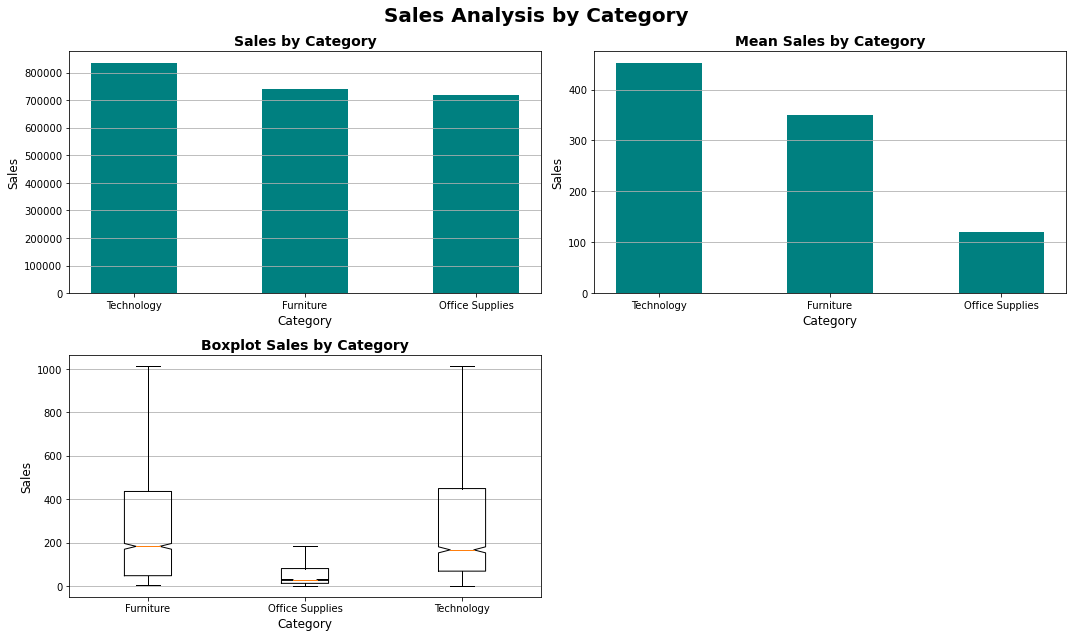

In [22]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_category = df[['Category', 'Sales']].groupby('Category').sum().reset_index()
sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_sales_per_category = df[['Category', 'Sales']].groupby('Category').mean().reset_index()
mean_sales_per_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_category['Category'], sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_category['Category'], mean_sales_per_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Sales'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

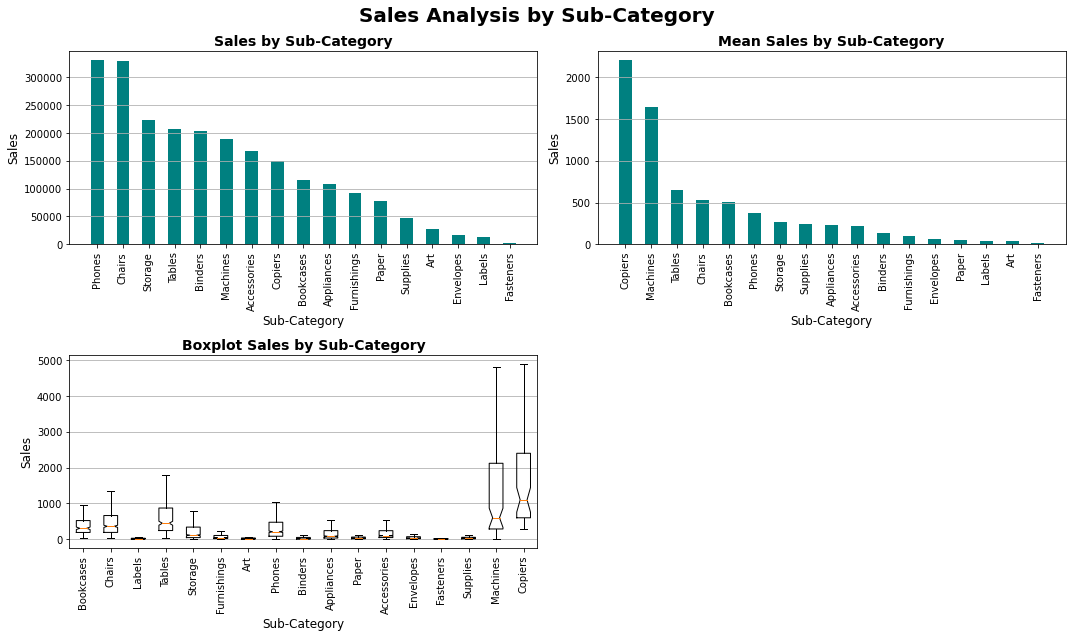

In [23]:
# Tính tổng giá trị sales theo Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').sum().reset_index()
sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_sales_per_sub_category = df[['Sub-Category', 'Sales']].groupby('Sub-Category').mean().reset_index()
mean_sales_per_sub_category.sort_values(by='Sales', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Sales Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(sales_per_sub_category['Sub-Category'], sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 0].set_title('Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Sales', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_sales_per_sub_category['Sub-Category'], mean_sales_per_sub_category['Sales'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Sales by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Sales', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10, rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == sub_category]['Sales'] for sub_category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Sales by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Sales', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(), rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

#### 2. Profit

Tính lợi nhuận (Profit) các sản phẩm đã bán dựa theo Category và Sub-category. Cách làm tương tự như trên.

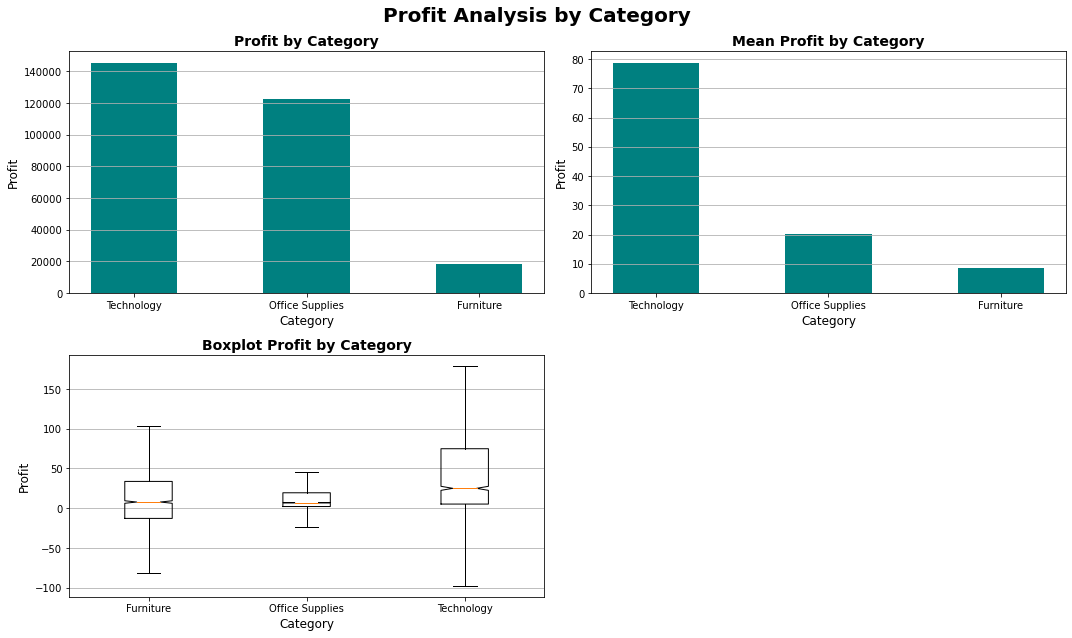

In [24]:
# Tính tổng giá trị Profit theo Category
# Gộp nhóm theo Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_category = df[['Category', 'Profit']].groupby('Category').sum().reset_index()
profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Category và lưu vào dataframe
mean_profit_per_category = df[['Category', 'Profit']].groupby('Category').mean().reset_index()
mean_profit_per_category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_category['Category'], profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_category['Category'], mean_profit_per_category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Category'] == category]['Profit'] for category in df['Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Category'].unique())
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

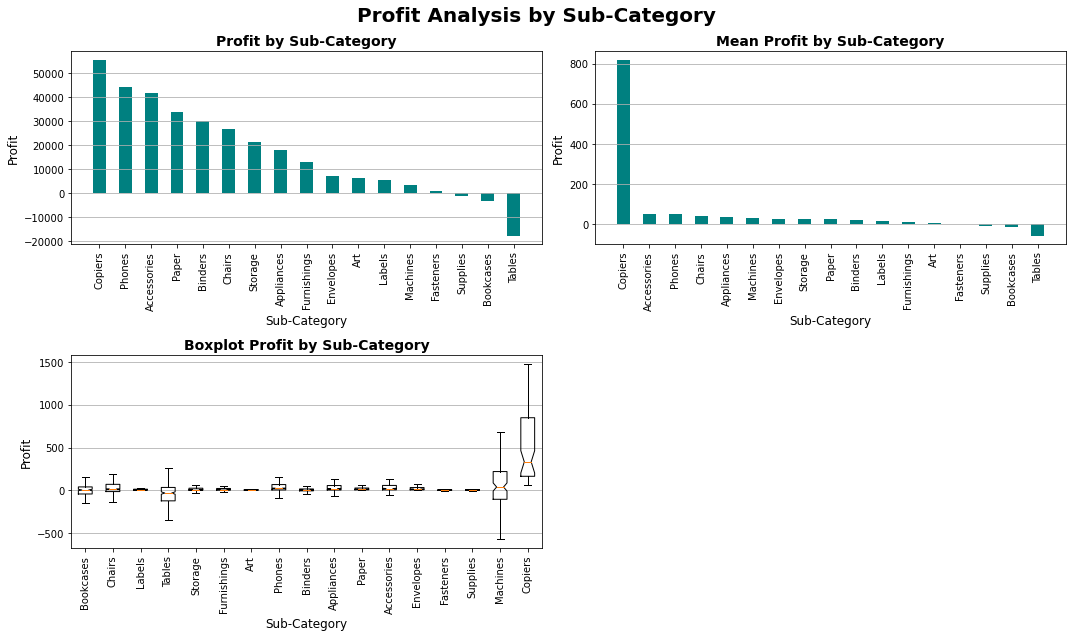

In [25]:
# Tính tổng giá trị Profit theo Sub-Category
# Gộp nhóm theo Sub-Category để tạo bảng tính tổng và lưu vào dataframe
profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().reset_index()
profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# Tính giá trị trung bình sale theo Sub-Category và lưu vào dataframe
mean_profit_per_Sub_Category = df[['Sub-Category', 'Profit']].groupby('Sub-Category').mean().reset_index()
mean_profit_per_Sub_Category.sort_values(by='Profit', ascending=False, inplace=True)

# kết hợp biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,9))
fig.suptitle('Profit Analysis by Sub-Category',fontweight='bold',fontsize=20)

# Vẽ biểu đồ con 1
axs[0, 0].bar(profit_per_Sub_Category['Sub-Category'], profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 0].set_title('Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Sub-Category', fontsize=12)
axs[0, 0].set_ylabel('Profit', fontsize=12)
axs[0, 0].ticklabel_format(style='plain', axis='y')
axs[0, 0].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 0].grid(axis='y')

# Vẽ biểu đồ con 2
axs[0, 1].bar(mean_profit_per_Sub_Category['Sub-Category'], mean_profit_per_Sub_Category['Profit'], width=0.5, color='teal')
axs[0, 1].set_title('Mean Profit by Sub-Category',fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Sub-Category', fontsize=12)
axs[0, 1].set_ylabel('Profit', fontsize=12)
axs[0, 1].ticklabel_format(style='plain', axis='y')
axs[0, 1].tick_params(axis='x', which='major', labelsize=10,rotation=90)
axs[0, 1].grid(axis='y')

# Vẽ biểu đồ con 3
axs[1, 0].boxplot([df[df['Sub-Category'] == Sub_Category]['Profit'] for Sub_Category in df['Sub-Category'].unique()], notch=True, showfliers=False)
axs[1, 0].set_title('Boxplot Profit by Sub-Category', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Sub-Category', fontsize=12)
axs[1, 0].set_ylabel('Profit', fontsize=12)
axs[1, 0].ticklabel_format(style='plain', axis='y')
axs[1, 0].set_xticklabels(df['Sub-Category'].unique(),rotation=90)
axs[1, 0].grid(axis='y')

# Xoá biểu đồ góc [1, 1]
axs[1, 1].remove()

plt.tight_layout()
plt.show()

### Câu 6: Đánh giá và phân tích về khách hàng


**Top khách hàng theo Sales**


<AxesSubplot: title={'center': 'Tên khách hàng & Số lượng đơn hàng'}>

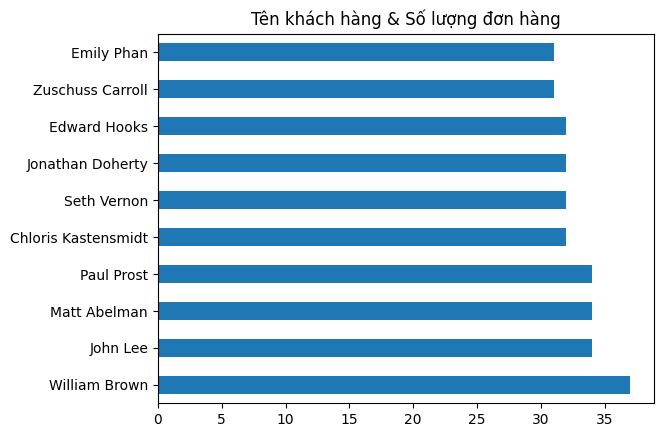

In [33]:
df['Customer Name'].value_counts()[:10].plot(kind='barh',title='Tên khách hàng & Số lượng đơn hàng')

**Phần trăm lợi nhuận của Top 9 khách hàng**

In [27]:
customers = list(df['Customer Name'].value_counts()[:10].index)
filters = df['Customer Name'].isin(customers)
A = df[filters]

In [35]:
#  Zuschuss Carroll is in the top 10 but her/his profit is negative
A = A[A['Customer Name'] != 'Zuschuss Carroll']
del customers[-2]

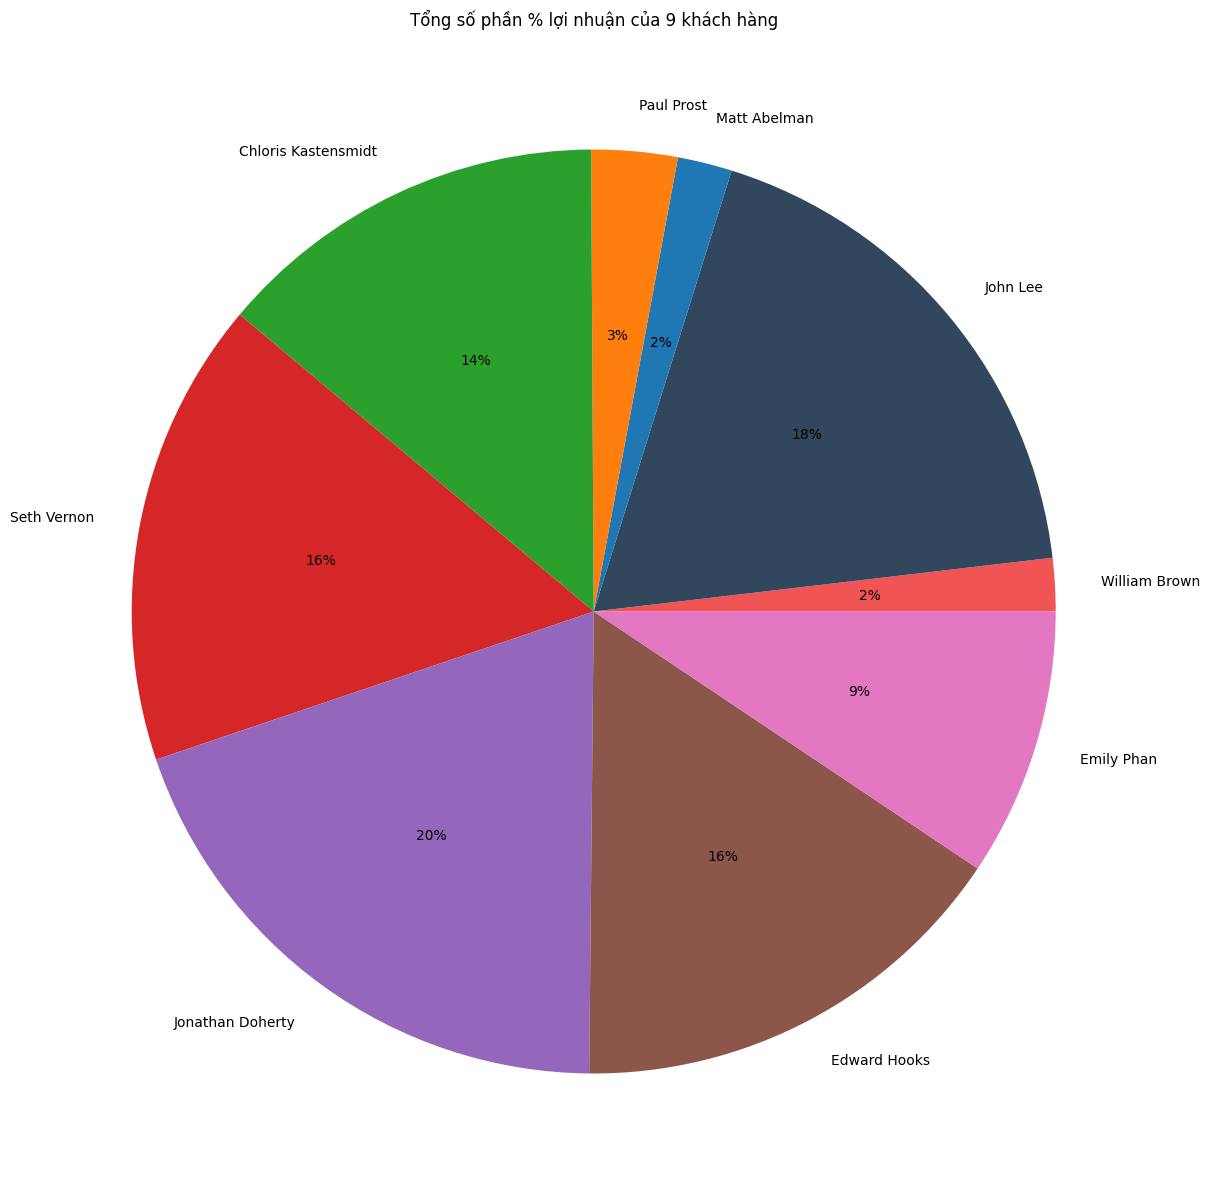

In [34]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
plt.figure(figsize=(15,15))
values = A.groupby('Customer Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("Tổng số phần % lợi nhuận của 9 khách hàng")
plt.show()

**Danh mục khách hàng mua nhiều nhất** 

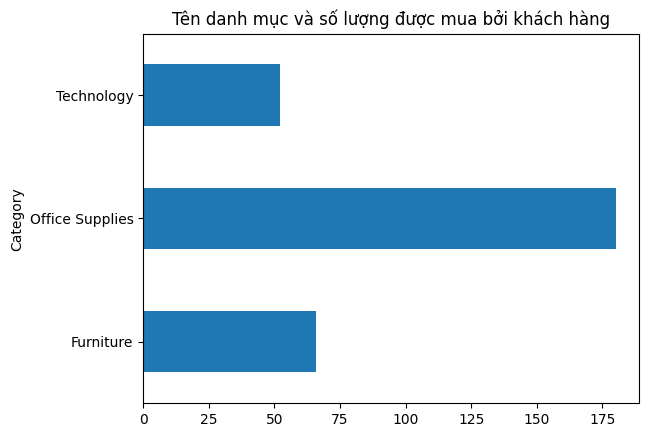

In [42]:
values = A.groupby('Category')['Customer Name'].count().plot(kind='barh',title='Tên danh mục và số lượng được mua bởi khách hàng')

Nhận xét: Dựa vào biểu đồ ta có thể thấy sự không đồng đều sức mua của khách hàng theo danh mục. Trong đó danh mục Office Supplies là danh mục được ưa chuộng nhất tiếp theo sau đó là Furniture và Technology. Giữa Furniture và Technology không có sự chênh lệch đáng kể

**Phân khúc bán hàng**

In [31]:
segments_info = df.groupby("Segment").sum().reset_index()
segments_info

<ipython-input-31-4524f742e94b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Segment,Row ID,Sales,Quantity,Discount,Profit
0,Consumer,25581329,1.161401e+06,19521,820.91,134119.2092
1,Corporate,15504734,7.061464e+05,11608,477.85,91979.1340
2,Home Office,8858952,4.296531e+05,6744,262.33,60298.6785


In [32]:
segments_info[['Segment' , 'Sales']]

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


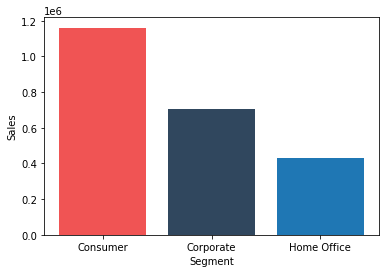

In [33]:
Viz_Bar(segments_info , 'Segment' ,'Sales')

**Lợi nhuận khách hàng**

In [34]:
segments_info[['Segment' , 'Profit']]

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


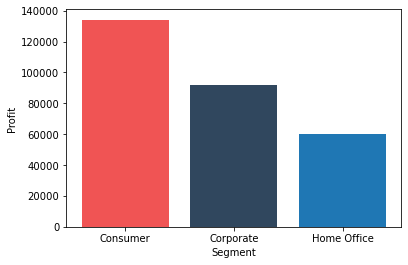

In [35]:
Viz_Bar(segments_info , 'Segment' ,'Profit')

### Câu 7: Phân tích mối quan hệ giữa khách hàng và khu vực sinh sống.

**Số lượng khách hàng và trung bình Sales và Profit theo khu vực sinh sống**

In [36]:
data_3= df.groupby(['Region','State'], as_index=False).agg(
                                number_order= ('Row ID','count'),
                                Số_lượng_khách_hàng= ('Customer ID','count'),
                                total_sale= ('Sales','sum'), 
                                total_profit= ('Profit','sum'))
data_3['Trung bình Sale']= data_3['total_sale']/data_3['Số_lượng_khách_hàng']
data_3['Trung bình Profit']= data_3['total_profit']/data_3['Số_lượng_khách_hàng']
data_3.head(2)

,Region,State,number_order,Số_lượng_khách_hàng,total_sale,total_profit,Trung bình Sale,Trung bình Profit
0,Central,Illinois,492,492,80166.101,-12607.8870,162.939230,-25.625787
1,Central,Indiana,149,149,53555.360,18382.9363,359.431946,123.375411


In [37]:
col_list= ['Trung bình Sale','Trung bình Profit']
def customer_1(data_3,col):
    fig= px.scatter(data_3, x="Số_lượng_khách_hàng", y=col, 
                   size='number_order',color="Region",
                 hover_name="State", log_x=True, size_max=80, 
                   title= f'Số lượng khách hàng và {col} theo bang')
    return fig

In [38]:
customer_fig_1=[]
for col in col_list:
    customer_fig_1.append(customer_1(data_3,col))

In [39]:
customer_fig_1[0]

In [40]:
customer_fig_1[1]